# 1. Gestion des valeurs Null

## 1) Import des données

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("../6.Data/kaggle_b2_fraud_train_v3.csv")

In [25]:
df

,customer_id,account_id,age,tenure_months,annual_income_eur,credit_score,num_transactions_30d,avg_amount_30d_eur,max_amount_30d_eur,days_since_last_login,...,internal_signal_5,internal_signal_6,internal_signal_7,internal_signal_8,terms_accepted_flag,partner_risk_indicator,manual_review_result,post_event_status_code,chargeback_resolution_time_days,legacy_partner_score
0,CUST_6O9Q8D4I36,ACC_TXXXTNEUVKFY,34,108,38635.01,544.0,20,60.92,80.16,4.9,...,0.39006,0.10963,0.55097,-0.56104,1,NaN,approve,0,7.9,NaN
1,CUST_FGUGTW230C,ACC_70VD7A4FFWCW,48,2,19912.97,703.0,21,112.11,571.12,0.3,...,0.03265,-0.40256,0.36218,0.86583,1,NaN,approve,0,5.5,NaN
2,CUST_8ZI3LCBZ0W,ACC_AF53381QSC0L,27,0,20326.87,720.0,25,73.61,492.57,4.6,...,-0.15637,0.57818,0.28902,-2.19864,1,NaN,approve,0,7.2,NaN
3,CUST_5MP3AR41CJ,ACC_U7WZGJ486LIV,45,49,38452.47,703.0,17,47.53,204.18,25.3,...,-1.02145,0.63908,-0.89190,-0.81592,1,NaN,approve,0,4.4,NaN
4,CUST_GNPL83JB0J,ACC_XW7DS3ED5J4Y,37,46,NaN,594.0,13,99.95,734.09,12.8,...,-0.65771,0.08020,0.17606,0.86739,1,NaN,approve,0,4.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,CUST_I81IW5SVRQ,ACC_UPDTFTYTSM0A,56,0,34775.62,727.0,21,51.72,226.11,3.8,...,-2.54086,-0.60747,0.23252,-0.06215,1,-1.535486,approve,0,1.0,NaN
159996,CUST_QT6DDEMKTJ,ACC_97NE0LBL5W9U,41,4,88617.57,770.0,18,NaN,171.07,15.1,...,0.34098,-1.78817,0.31788,0.51072,1,NaN,approve,0,7.4,NaN
159997,CUST_I0JS1GTS98,ACC_9JJ84W64Z7GX,30,2,41148.54,738.0,20,29.34,119.81,0.7,...,-1.28947,-0.32324,-0.06238,-0.99076,1,NaN,approve,3,6.6,NaN
159998,CUST_L7GUCJ3TFY,ACC_NGFXDR7HW1ZS,56,6,NaN,719.0,25,88.56,553.16,22.6,...,0.47179,-0.22090,-1.34239,-0.30513,1,NaN,approve,0,12.5,NaN


Il y a 160000 lignes pour 56 colonnes

## 2) Inspection global

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   customer_id                      160000 non-null  object 
 1   account_id                       160000 non-null  object 
 2   age                              160000 non-null  int64  
 3   tenure_months                    160000 non-null  int64  
 4   annual_income_eur                148814 non-null  float64
 5   credit_score                     152048 non-null  float64
 6   num_transactions_30d             160000 non-null  int64  
 7   avg_amount_30d_eur               150453 non-null  float64
 8   max_amount_30d_eur               152077 non-null  float64
 9   days_since_last_login            160000 non-null  float64
 10  support_tickets_90d              160000 non-null  int64  
 11  chargebacks_12m                  160000 non-null  int64  
 12  fa

La typologie est correcte pour chaque  colonne

In [27]:
df.describe()

,age,tenure_months,annual_income_eur,credit_score,num_transactions_30d,avg_amount_30d_eur,max_amount_30d_eur,days_since_last_login,support_tickets_90d,chargebacks_12m,...,internal_signal_4,internal_signal_5,internal_signal_6,internal_signal_7,internal_signal_8,terms_accepted_flag,partner_risk_indicator,post_event_status_code,chargeback_resolution_time_days,legacy_partner_score
count,160000.000000,160000.000000,1.488140e+05,152048.000000,160000.000000,150453.000000,152077.000000,160000.000000,160000.000000,160000.000000,...,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.0,4751.000000,160000.000000,160000.000000,6264.000000
mean,38.239075,17.898356,3.761071e+04,670.067327,22.901775,61.626094,298.683078,12.019874,0.797850,0.049931,...,-0.000427,-0.000285,0.000559,-0.001698,-0.000445,1.0,-0.005003,0.257069,6.798126,-0.023656
std,11.751027,17.781320,2.693766e+04,59.985184,34.776594,41.795545,256.039318,12.033636,0.894715,0.223217,...,0.999285,0.997891,0.999006,1.000762,0.997346,0.0,1.006872,0.871035,5.542037,1.008418
min,-14.000000,-23.000000,-1.994171e+04,380.000000,5.000000,-49.675409,0.610000,0.000000,0.000000,0.000000,...,-5.166910,-4.159100,-4.845700,-5.101360,-4.465930,1.0,-4.067918,0.000000,0.000000,-3.819104
25%,30.000000,5.000000,2.204844e+04,630.000000,19.000000,30.970000,117.380000,3.500000,0.000000,0.000000,...,-0.675655,-0.670640,-0.672752,-0.673293,-0.672190,1.0,-0.685078,0.000000,3.400000,-0.713137
50%,38.000000,12.000000,3.194314e+04,670.000000,22.000000,52.540000,224.730000,8.300000,1.000000,0.000000,...,-0.002575,0.000560,0.002600,-0.004255,-0.002920,1.0,0.005115,0.000000,6.200000,-0.023162
75%,46.000000,25.000000,4.645079e+04,710.000000,25.000000,82.370000,402.170000,16.700000,1.000000,0.000000,...,0.673510,0.674070,0.675820,0.675828,0.671020,1.0,0.669542,0.000000,9.000000,0.658035
max,159.000000,120.000000,1.355012e+06,850.000000,1923.000000,417.100000,2994.200000,184.600000,7.000000,3.000000,...,4.183620,4.601760,4.631420,4.192480,4.878210,1.0,3.649050,4.000000,63.100000,3.607133


In [28]:
df.isna().sum()

customer_id                             0
account_id                              0
age                                     0
tenure_months                           0
annual_income_eur                   11186
credit_score                         7952
num_transactions_30d                    0
avg_amount_30d_eur                   9547
max_amount_30d_eur                   7923
days_since_last_login                   0
support_tickets_90d                     0
chargebacks_12m                         0
failed_payments_6m                      0
device_trust_z                       6384
ip_risk_z                            4767
is_vpn                                  0
num_devices_30d                         0
is_new_device                           0
channel                                 0
signup_source                           0
plan_type                               0
payment_method                          0
browser                                 0
os                                

On va gérer les valeurs nulls pour les colonnes annual_income_eur / credit_score / avg_amount_30d_eur / max_amount_30d_eur / device_trust_z / ip_risk_z / secondary_email /legacy_partner_score / merchant_category / occupation / customer_note / last_ticket_subject / region                 

## 3) Gestion des valeurs nulls

In [30]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

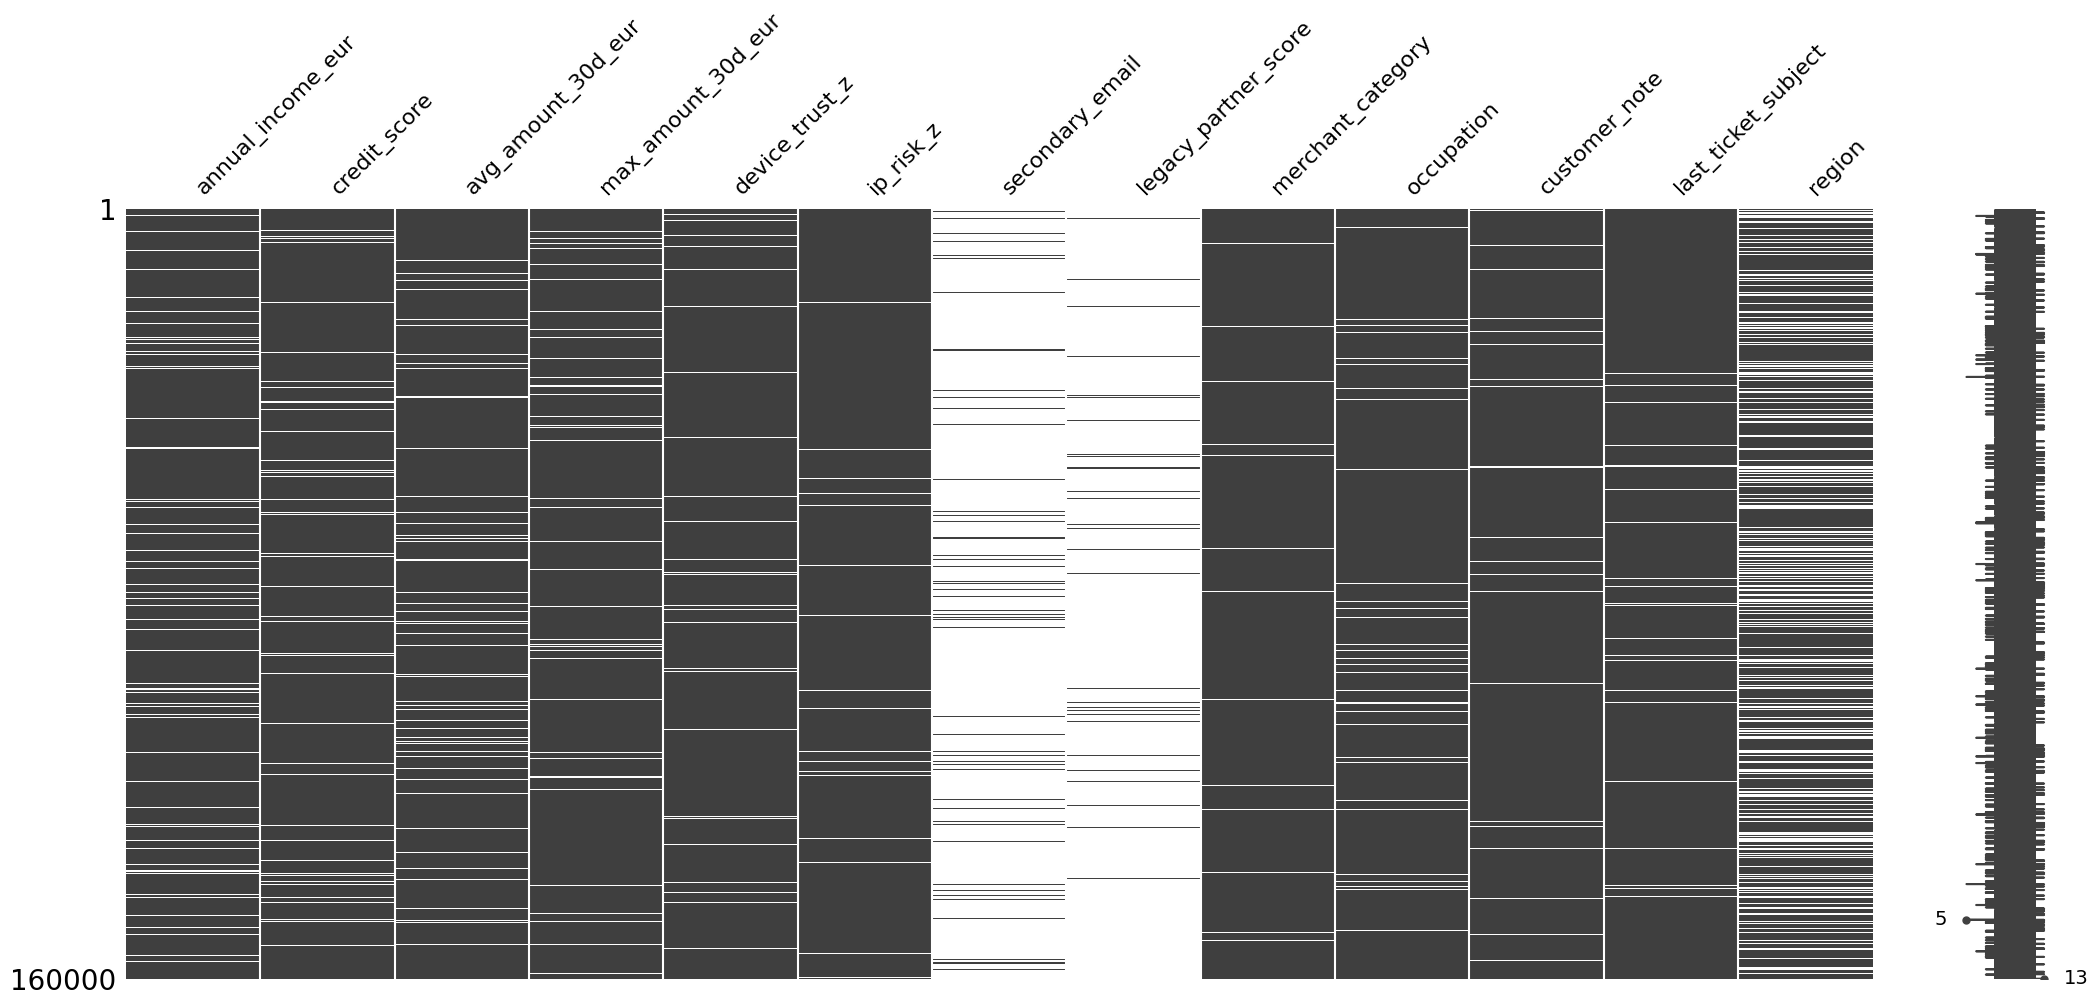

In [36]:
import missingno as msno
import numpy as np

selected_cols = [
    "annual_income_eur",
    "credit_score",
    "avg_amount_30d_eur",
    "max_amount_30d_eur",
    "device_trust_z",
    "ip_risk_z",
    "secondary_email",
    "legacy_partner_score",
    "merchant_category",
    "occupation",

    "customer_note",
    "last_ticket_subject",
    "region"
]

df_subset = df[selected_cols].copy()
df_graph= pd.DataFrame(df_subset)

# 1. Matrix plot - shows missingness visually
msno.matrix(df_graph)


On ne remarque pas de valeurs manquantes communes entre les différentes colonnes, il faut faire attention à la supression de lignes des valeurs manquantes (additionel)

In [29]:
#df["annual_income_eur"] = df["annual_income_eur"].fillna(df["annual_income_eur"].median())
#df["credit_score"] = df["credit_score"].fillna(df["credit_score"].median())
#df["avg_amount_30d_eur"] = df["avg_amount_30d_eur"].fillna(df["avg_amount_30d_eur"].median())
#df["max_amount_30d_eur"] = df["max_amount_30d_eur"].fillna(df["max_amount_30d_eur"].median())
#df["device_trust_z"] = df["device_trust_z"].fillna(df["device_trust_z"].mean())
#df["ip_risk_z"] = df["ip_risk_z"].fillna(df["ip_risk_z"].mean())


Pour les colonnes annual_income_eur / credit_score / avg_amount_30d_eur / max_amount_30d_eur il faudra remplacer les valeurs manquantes par la médiane car on réalise la gestion des valeurs manquantes avant celle des outliers : la moyenne peut être faussé par ceux-ci

Pour les colonnes device_trust_z / ip_risk_z , les deux colonnes sont déjà standardisé et ne possède pas de valeur aberrantes. Alors on remplace les valeurs manquantes par la moyenne. 

Pour les colonnes secondary_email /legacy_partner_score, ce sont des features intéressantes à maintenir mais elle possède trop 